In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
from Lib.module.movidas import *

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
np.random.seed(0)

In [19]:
freq = 'B'
assets = ['JPM UN Equity', 'PFE UN Equity', 'XOM UN Equity']
nb_asset = len(assets)

df = get_df(assets)


Y = df.values

In [20]:
Y.shape

(3446, 3)

In [21]:
nb_asset = 3
budgets = np.ones(nb_asset)/nb_asset

In [22]:

Y = df.values
Y

array([[ 0.03165034,  0.03279542,  0.01652893],
       [ 0.01996591,  0.00201613, -0.00711382],
       [-0.09477202, -0.00804829, -0.01637666],
       ...,
       [-0.01097744, -0.0152049 ,  0.0208706 ],
       [-0.03223354, -0.00018829,  0.01413551],
       [-0.00926944,  0.00037665,  0.0117498 ]])

In [23]:
covmat = np.cov(Y, rowvar=False)

In [24]:
X = multivariate_normal.rvs(cov= covmat, size=1000000)

In [25]:
rb = RiskBudgeting(risk_measure='volatility', budgets=budgets)
rb.solve(X, store=False, epochs=15)
x_vol = rb.x
print(x_vol)
#plt.plot(rb.ys);

[0.24114729 0.41462884 0.34422387]


In [ ]:
rb = RiskBudgeting(risk_measure='expected_shortfall', budgets=budgets, alpha=.95, expectation=True)
rb.solve(X, store=False, epochs=15)
x_es_e = rb.x
print(x_es_e)
#plt.plot(rb.ys);

In [26]:
M = 100
n_val=1000000

In [27]:
problem1 = stoch_sol_measures(X, M , n_val, nb_asset, budgets, measure='volatility')
problem1.results()

100%|██████████| 10/10 [01:58<00:00, 11.83s/it]

==== MD Risk Budgeting portfolio ====
[0.2417 0.4138 0.3445]
==== MD Risk Budgeting portfolio wo ====
[11.6137 19.8861 16.5547]


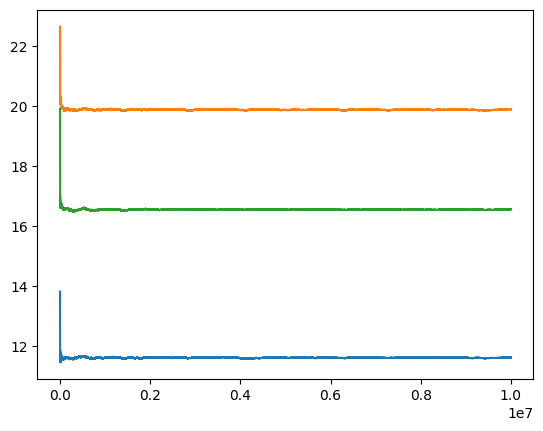

In [28]:
problem1.graph_y()

In [30]:
problem2 = stoch_sol_measures(X, M , n_val, nb_asset, budgets, measure='VaR')
problem2.results()

100%|██████████| 10/10 [03:02<00:00, 18.21s/it]


==== MD Risk Budgeting portfolio ====
[0.2418 0.414  0.3442]
==== MD Risk Budgeting portfolio wo ====
[ 7.9655 13.6382 11.3408]


In [31]:
problem3 = stoch_sol_measures(X, M , n_val, nb_asset, budgets, measure='MAD')
problem3.results()

100%|██████████| 10/10 [02:38<00:00, 15.88s/it]

==== MD Risk Budgeting portfolio ====
[0.2417 0.4137 0.3446]
==== MD Risk Budgeting portfolio wo ====
[20.5742 35.218  29.3405]


In [37]:
M = 1000
#for variantile we need to increase the M

In [38]:
problem4 = stoch_sol_measures(X, M , n_val, nb_asset, budgets, measure='variantile')
problem4.results()

100%|██████████| 10/10 [03:17<00:00, 19.76s/it]

==== MD Risk Budgeting portfolio ====
[0.2417 0.414  0.3443]
==== MD Risk Budgeting portfolio wo ====
[28.6362 49.0478 40.7875]
